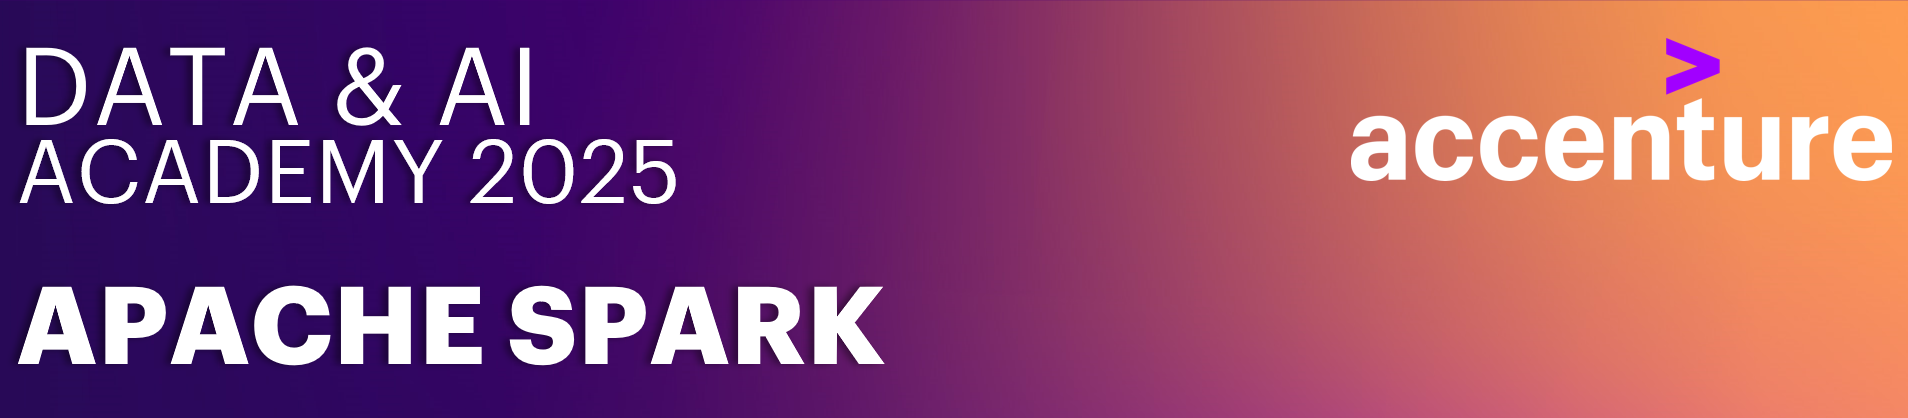

In [ ]:
from IPython.display import Image

# Specify the path to your image file
image_path = 'sample_data/data-ai-academy-wallpaper.png'

# Display the image
display(Image(filename=image_path))

## Introdução

Este notebook será o nosso _playground_ para conhecermos na prática as principais transformações e ações do Apache Spark, utilizando PySpark e SparkSQL. Iremos explorar e entender alguns tópicos que julgamos mais interessantes para o uso eficaz deste poderoso framework de processamento de dados.

## Tópicos Abordados

- **Leitura de arquivos**
    - Leitura de arquivos CSV e JSON para criação de DataFrame.
    - Plus: .count(), Criação de DataFrame com Schema, .printSchema()
- **Transformações no DataFrame**
    - Criação de coluna com withColumn()
    - Operações com strings com .lit(), .concat(), .col(), .split()
    - Seleção de Colunas com .select()
- **Filtro de Dados**
    - Aplicação de filtros para selecionar subconjuntos de dados
    - Casting (mudança de tipos de dados)
    - Plus: .distinct(), .orderBy(), withColumnRenamed(), groupBy(), .collect(), .substring()
- **Joins**
    - Combinação de DataFrames
- **Escrita de Arquivos**
    - Escrita de DataFrames em arquivos parquet
- **createOrReplaceTempView**
    - Criação de `createOrReplaceTempView` para execução de consultas SQL.

Vamos iniciar nossa jornada para dominar o Apache Spark e suas capacidades excepcionais para processamento distribuído de grandes volumes de dados.


#### Os próximos passos serão para realizar a instalação do spark na sessão do notebook

In [ ]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Sparks.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,851 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,138 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

!ls

sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
# Initialize findspark
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [66]:
spark.version

'3.1.1'

#### Passo necessário para conseguir realizar a leitura de arquivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Leitura de arquivos

#### Arquivos **csv**
Para realizar a leitura de um arquivo **csv**, precisamos setar algumas configurações. Na [documentação oficial do Spark para leitura de arquivos csv](https://spark.apache.org/docs/latest/sql-data-sources-csv.html), exibe uma forma de fazer essa leitura. Neste exemplo, vou trazer outro método para realizar tal operação. O download dos datasets utilizados nesse exemplo podem ser feitos pelo [kaggle](https://www.kaggle.com/datasets/bwandowando/rotten-tomatoesall-time-best-super-hero-movies).

In [73]:
options = {
    "header": "true",
    "delimiter": ","
}
df_movies_csv =  spark.read.format('csv').options(**options).load("sample_data/movies.csv")
df_movies_csv.show(5, truncate=False) # .show() é a função utilizada para visualizar uma parte do dataframe. Bastante usada para validar o dado em vários momentos do desenvolvimento.

+------------------------------------+-------------------------------------------+---------+---------------------------------------------------------------------------+---------+------------+--------------+
|movieId                             |movieTitle                                 |movieYear|movieURL                                                                   |movieRank|critic_score|audience_score|
+------------------------------------+-------------------------------------------+---------+---------------------------------------------------------------------------+---------+------------+--------------+
|4517f650-c60a-4edc-b37e-9236213c2b93|Spider-Man: Into the Spider-Verse          |2018     |https://www.rottentomatoes.com/m/spider_man_into_the_spider_verse          |1        |97%         |94%           |
|9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3|The Incredibles                            |2004     |https://www.rottentomatoes.com/m/the_incredibles                           |2   

In [74]:
# Caso seja necessário validar a volumetria do arquivo.
qtd_registros = df_movies_csv.count()

print(f"Total de registros do dataset movies.csv: {qtd_registros}")

# O count() é uma função muito útil em determinadas aplicações para validação e criação de regras de negócio. Contudo, à depender do workload processado, pode onerar bastante do driver do Spark.

Total de registros do dataset movies.csv: 100


#### Arquivos **json**
Para realizar a leitura de um arquivo **json**, precisamos setar algumas configurações. Na [documentação oficial do Spark para leitura de arquivos json](https://spark.apache.org/docs/latest/sql-data-sources-json.html), exibe uma forma de fazer essa leitura. Neste exemplo, vou trazer outro método para realizar tal operação.

In [ ]:
options_json: {
    "multiLine": "true"
}

df_json = spark.read.format('json').options(**options).load("sample_data/goat_sports.json")
df_json.show(5)

+----------+--------------------+-----------+------------+---------+-----------+-----------+--------------------+--------+
|birth_year|             company|current_age|extract_date|     name|nationality|       role|              skills|   sport|
+----------+--------------------+-----------+------------+---------+-----------+-----------+--------------------+--------+
|      1977|New England Patriots|         46|  2024-07-12|Tom Brady|         US|quarterback|{slot throw, lead...|football|
+----------+--------------------+-----------+------------+---------+-----------+-----------+--------------------+--------+



**Observação:** Também é possível definir o *schema* esperado para leitura. Dessa forma, é possível garantir a qualidade e consistência das transformações executadas durante o processamento.

In [75]:
# Definindo schema

from pyspark.sql.types import StringType, StructField, StructType, IntegerType, DateType, MapType

SCHEMA = StructType([
    StructField("name", StringType(), True), # Parâmetros: nome do campo, datatype, flag se aceita valor nulo ou não
    StructField("nationality", StringType(), True),
    StructField("sport", StringType(), True),
    StructField("company", StringType(), True),
    StructField("role", StringType(), True),
    StructField("birth_year", IntegerType(), True),
    StructField("current_age", IntegerType(), True),
    StructField("skills", MapType(StringType(), StringType()), True),
    StructField("extract_date", DateType(), True),
])

In [76]:
# Aplicando schema
spark.read.json("sample_data/goat_sports.json", schema=SCHEMA).show()
df_json_with_schema = spark.read.schema(SCHEMA).format('json').options(**options).load("sample_data/goat_sports.json")
df_json_with_schema.show()

+-----------------+-----------+---------------+--------------------+--------------+----------+-----------+--------------------+------------+
|             name|nationality|          sport|             company|          role|birth_year|current_age|              skills|extract_date|
+-----------------+-----------+---------------+--------------------+--------------+----------+-----------+--------------------+------------+
|        Tom Brady|         US|       football|New England Patriots|   quarterback|      1977|         46|{hard skills -> s...|  2024-07-12|
|   Michael Jordan|         US|     basketball|       Chicago Bulls|shooting guard|      1963|         61|{hard skills -> s...|  2024-07-12|
|       Usain Bolt|    Jamaica|track and field|Jamaica National ...|      sprinter|      1986|         38|{hard skills -> s...|  2024-07-12|
|  Serena Williams|         US|         tennis|                 WTA|        player|      1981|         42|{hard skills -> p...|  2024-07-12|
|     Lionel 

In [77]:
# Caso seja necessário validar o schema do dado
df_json_with_schema.printSchema()

root
 |-- name: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- sport: string (nullable = true)
 |-- company: string (nullable = true)
 |-- role: string (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- current_age: integer (nullable = true)
 |-- skills: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- extract_date: date (nullable = true)



### Transformações no DataFrame

#### Criação de colunas

In [78]:
from pyspark.sql.functions import lit, concat, col, split

In [79]:
# criando coluna com valor literal (constante)
df_movies_csv_create_column_lit = df_movies_csv.withColumn("development_name", lit("Levi")) # Parâmetros: Nome da coluna, função para criação de valor
df_movies_csv_create_column_lit = df_movies_csv_create_column_lit.withColumn("development_last_name", lit("Souza"))
df_movies_csv_create_column_lit.show(5)

+--------------------+--------------------+---------+--------------------+---------+------------+--------------+----------------+---------------------+
|             movieId|          movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|development_name|development_last_name|
+--------------------+--------------------+---------+--------------------+---------+------------+--------------+----------------+---------------------+
|4517f650-c60a-4ed...|Spider-Man: Into ...|     2018|https://www.rotte...|        1|         97%|           94%|            Levi|                Souza|
|9ddacc49-1918-372...|     The Incredibles|     2004|https://www.rotte...|        2|         97%|           75%|            Levi|                Souza|
|e1374d4d-19b0-31b...|       Black Panther|     2018|https://www.rotte...|        3|         96%|           79%|            Levi|                Souza|
|27539355-4940-4c2...|Spider-Man: Acros...|     2023|https://www.rotte...|        4|    

In [80]:
# concatenando campos
df_movies_csv_concat = df_movies_csv_create_column_lit.withColumn("full_name", concat(col("development_name"), lit(" "), col("development_last_name")))
df_movies_csv_concat.show(5)

+--------------------+--------------------+---------+--------------------+---------+------------+--------------+----------------+---------------------+----------+
|             movieId|          movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|development_name|development_last_name| full_name|
+--------------------+--------------------+---------+--------------------+---------+------------+--------------+----------------+---------------------+----------+
|4517f650-c60a-4ed...|Spider-Man: Into ...|     2018|https://www.rotte...|        1|         97%|           94%|            Levi|                Souza|Levi Souza|
|9ddacc49-1918-372...|     The Incredibles|     2004|https://www.rotte...|        2|         97%|           75%|            Levi|                Souza|Levi Souza|
|e1374d4d-19b0-31b...|       Black Panther|     2018|https://www.rotte...|        3|         96%|           79%|            Levi|                Souza|Levi Souza|
|27539355-4940-4c2...|

In [115]:
from pyspark.sql.functions import lit, concat, col, split
options = {
    "header": "true",
    "delimiter": ","
}
df_movies_csv =  spark.read.format('csv').options(**options)\
      .load("sample_data/movies.csv")
df_movies_csv_split = df_movies_csv.withColumn(
    "fields_split", split("movieTitle", " ")[0]# splitar o dado que traga o 1 elemento
    ) # O campo fields_split receberá um array

df_movies_csv_split = df_movies_csv_split.withColumn(
    "fields_split", split("fields_split", ":")[0]# splitar o dado que traga o 1 elemento
    ) # O campo fields_split receberá um array

# df_movies_csv_split.select("fields_split").show(5)
df_movies_csv_split.show(5, truncate=False)

+------------------------------------+-------------------------------------------+---------+---------------------------------------------------------------------------+---------+------------+--------------+------------+
|movieId                             |movieTitle                                 |movieYear|movieURL                                                                   |movieRank|critic_score|audience_score|fields_split|
+------------------------------------+-------------------------------------------+---------+---------------------------------------------------------------------------+---------+------------+--------------+------------+
|4517f650-c60a-4edc-b37e-9236213c2b93|Spider-Man: Into the Spider-Verse          |2018     |https://www.rottentomatoes.com/m/spider_man_into_the_spider_verse          |1        |97%         |94%           |Spider-Man  |
|9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3|The Incredibles                            |2004     |https://www.rottentomatoes.c

In [116]:
# selecionando apenas o campo fields_split podemos validar todos os valores contidos no array.
# com a função select(), poderá ser explicitado os campos são necessários para criar outro dataframe ou executar a operação desejada.
list_movies_top_3 = df_movies_csv_split.select("fields_split").head(3) # a função head é utilizada para retornar os  primeiros registros do dataframe. Default: primeira registro

In [118]:
for movie in list_movies_top_3:
  print(movie[0])

Spider-Man
The
Black


<div class="alert alert-info">
As funções que podemos utilizar para criar colunas manipulando string são diversas. Segue mais exemplos:
</div>  

- **substring**: Responsável por selecionar parte do texto. Exemplo:  
  `df = df.withColumn("first_name", substring(df.full_name, 1, 5))`
   
- **length**: Retorna o tamanho de caracteres da string. Exemplo:  
  `df = df.withColumn("name_length", length(df.full_name))`

  
- **upper, lower**: Converte a string para maiúsculas ou minúsculas.  
  `df = df.withColumn("upper_name", upper(df.full_name))`  
  `df = df.withColumn("lower_name", lower(df.full_name))`

  
- **trim, ltrim, rtrim**: Remove espaços em branco à esquerda, à direita ou de ambos os lados da string.  
  `df = df.withColumn("trimmed_name", trim(df.full_name))`  
  `df = df.withColumn("ltrimmed_name", ltrim(df.full_name))`  
  `df = df.withColumn("rtrimmed_name", rtrim(df.full_name))`

  
- **regexp_replace**: Substitui ocorrências de um padrão de expressão regular em uma string.  
  `df = df.withColumn("clean_name", regexp_replace(df.full_name, "[^a-zA-Z0-9 ]", ""))`  

### Filtros de Dados

In [97]:
# Antes de realizar o filtro, vamos analistar o dataframe.
# No caso, desejo verificar quais são os anos que os filmes da base de dados foram lançados.
# Para isso selecionei o campo movieYear, aplicando o distinct e, na mesma operação, apliquei a ordenação.
df_movies_csv.select("movieYear").distinct().orderBy("movieYear").show()

+---------+
|movieYear|
+---------+
|     1966|
|     1978|
|     1980|
|     1982|
|     1984|
|     1987|
|     1989|
|     1990|
|     1991|
|     1992|
|     1993|
|     1994|
|     1998|
|     1999|
|     2000|
|     2001|
|     2002|
|     2003|
|     2004|
|     2005|
+---------+
only showing top 20 rows



In [98]:
# Também é possível realizar agrupamento de dados para análises
df_movies_csv_grouped_year = df_movies_csv.groupBy("movieYear").count()
df_movies_csv_grouped_year = df_movies_csv_grouped_year.withColumnRenamed("count", "qtde_movies")
df_movies_csv_grouped_year.orderBy(df_movies_csv_grouped_year["qtde_movies"].desc()).show()

+---------+-----------+
|movieYear|qtde_movies|
+---------+-----------+
|     2018|          9|
|     2017|          7|
|     2014|          5|
|     2023|          5|
|     2019|          5|
|     2021|          5|
|     2022|          4|
|     2008|          4|
|     2013|          4|
|     2012|          4|
|     2006|          3|
|     2010|          3|
|     2020|          3|
|     2004|          3|
|     2002|          3|
|     2016|          3|
|     2011|          3|
|     1994|          2|
|     2015|          2|
|     2000|          2|
+---------+-----------+
only showing top 20 rows



Foi possível validar que no ano de 2018 tem o maior número de filmes na lista. Vamos saber quais são:

In [99]:
df_movies_csv_movies_2018 = df_movies_csv.filter(col("movieYear") == 2018)
df_movies_csv_movies_2018.show(5)

+--------------------+--------------------+---------+--------------------+---------+------------+--------------+
|             movieId|          movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|
+--------------------+--------------------+---------+--------------------+---------+------------+--------------+
|4517f650-c60a-4ed...|Spider-Man: Into ...|     2018|https://www.rotte...|        1|         97%|           94%|
|e1374d4d-19b0-31b...|       Black Panther|     2018|https://www.rotte...|        3|         96%|           79%|
|487e9820-001e-3da...|       Incredibles 2|     2018|https://www.rotte...|       15|         93%|           84%|
|a35e309a-6ed7-373...|Teen Titans GO! t...|     2018|https://www.rotte...|       21|         91%|           71%|
|41ccc283-198e-3d3...|Ant-Man and The Wasp|     2018|https://www.rotte...|       32|         87%|           79%|
+--------------------+--------------------+---------+--------------------+---------+------------

In [101]:
df_movies_csv_movies_2018.select("movieTitle").collect()
# O Comando collect() retorna um array dos dados do dataframe.
# Contudo, como um processo que executa no driver, deve-se ter cuidado com o workload analisado para que não se tenha problema de falta de memória (Out Of Memory Error)

[Row(movieTitle='Spider-Man: Into the Spider-Verse'),
 Row(movieTitle='Black Panther'),
 Row(movieTitle='Incredibles 2'),
 Row(movieTitle='Teen Titans GO! to the Movies'),
 Row(movieTitle='Ant-Man and The Wasp'),
 Row(movieTitle='Avengers: Infinity War'),
 Row(movieTitle='Deadpool 2'),
 Row(movieTitle='Fast Color'),
 Row(movieTitle='Aquaman')]

Agora, vamos realizar uma contagem dos filmes em que o **critic_score** e **audience_score** devem ter rating maior ou igual a 90%.

In [102]:
from pyspark.sql.functions import substring

In [104]:
df_movies_csv.show()

+--------------------+--------------------+---------+--------------------+---------+------------+--------------+
|             movieId|          movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|
+--------------------+--------------------+---------+--------------------+---------+------------+--------------+
|4517f650-c60a-4ed...|Spider-Man: Into ...|     2018|https://www.rotte...|        1|         97%|           94%|
|9ddacc49-1918-372...|     The Incredibles|     2004|https://www.rotte...|        2|         97%|           75%|
|e1374d4d-19b0-31b...|       Black Panther|     2018|https://www.rotte...|        3|         96%|           79%|
|27539355-4940-4c2...|Spider-Man: Acros...|     2023|https://www.rotte...|        4|         95%|           94%|
|2da44bd6-2a22-323...|Teenage Mutant Ni...|     2023|https://www.rotte...|        5|         95%|           90%|
|7b2bcd9a-359f-3ff...|   Avengers: Endgame|     2019|https://www.rotte...|        6|         94%

In [103]:
# 1. Transforma as colunas critic_score e audience_score em números.
# 1.1 Separando o número do caractere % e realizando o casting dos dados
df_movies_csv_movies_critic_audience_integer_score = df_movies_csv.withColumn(
    "critic_score_integer", substring(col("critic_score"), 1, 2).cast("int")
    ).withColumn("audience_score_integer", substring(col("audience_score"), 1, 2).cast("int")
    )
df_movies_csv_movies_critic_audience_integer_score.show(5)

+--------------------+--------------------+---------+--------------------+---------+------------+--------------+--------------------+----------------------+
|             movieId|          movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|critic_score_integer|audience_score_integer|
+--------------------+--------------------+---------+--------------------+---------+------------+--------------+--------------------+----------------------+
|4517f650-c60a-4ed...|Spider-Man: Into ...|     2018|https://www.rotte...|        1|         97%|           94%|                  97|                    94|
|9ddacc49-1918-372...|     The Incredibles|     2004|https://www.rotte...|        2|         97%|           75%|                  97|                    75|
|e1374d4d-19b0-31b...|       Black Panther|     2018|https://www.rotte...|        3|         96%|           79%|                  96|                    79|
|27539355-4940-4c2...|Spider-Man: Acros...|     2023|https

In [105]:
df_movies_csv_movies_critic_audience_integer_score.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- movieTitle: string (nullable = true)
 |-- movieYear: string (nullable = true)
 |-- movieURL: string (nullable = true)
 |-- movieRank: string (nullable = true)
 |-- critic_score: string (nullable = true)
 |-- audience_score: string (nullable = true)
 |-- critic_score_integer: integer (nullable = true)
 |-- audience_score_integer: integer (nullable = true)



In [106]:
df_movies_csv_movies_critic_audience_integer_maior_igual_90 = df_movies_csv_movies_critic_audience_integer_score.filter(
    (df_movies_csv_movies_critic_audience_integer_score["critic_score_integer"] >= 90)
    & (df_movies_csv_movies_critic_audience_integer_score["audience_score_integer"] >= 90)
)
df_movies_csv_movies_critic_audience_integer_maior_igual_90.show(5)

+--------------------+--------------------+---------+--------------------+---------+------------+--------------+--------------------+----------------------+
|             movieId|          movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|critic_score_integer|audience_score_integer|
+--------------------+--------------------+---------+--------------------+---------+------------+--------------+--------------------+----------------------+
|4517f650-c60a-4ed...|Spider-Man: Into ...|     2018|https://www.rotte...|        1|         97%|           94%|                  97|                    94|
|27539355-4940-4c2...|Spider-Man: Acros...|     2023|https://www.rotte...|        4|         95%|           94%|                  95|                    94|
|2da44bd6-2a22-323...|Teenage Mutant Ni...|     2023|https://www.rotte...|        5|         95%|           90%|                  95|                    90|
|7b2bcd9a-359f-3ff...|   Avengers: Endgame|     2019|https

In [107]:
df_count_maior_90 = df_movies_csv_movies_critic_audience_integer_maior_igual_90.count()
print(f"Total de filmes que tem avaliação da critica e audiencia maior ou igual a 90%: {df_count_maior_90}")

Total de filmes que tem avaliação da critica e audiencia maior ou igual a 90%: 14


### Joins

Para testar o join iremos utilizar a base que estamos atuando **df_movies_csv** e as bases **critic_reviews.csv** e **user_reviews.csv**, que apresentam informações sobre as os reviews/notas dos críticos e usuários de cinema/files respectivamente.

In [119]:
# import critic_reviews.csv

options = {
    "header": "true",
    "delimiter": ","
}
df_critic_reviews_csv = spark.read.format('csv').options(**options).load("sample_data/critic_reviews.csv")
df_critic_reviews_csv.show(5)

+--------+------------+--------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+-----------------+--------------------+--------------------+--------------+-------------+--------------------+
|reviewId|creationDate|    criticName|       criticPageUrl|reviewState|isFresh|isRotten|isRtUrl|isTopCritic|      publicationUrl|  publicationName|           reviewUrl|               quote|scoreSentiment|originalScore|             movieId|
+--------+------------+--------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+-----------------+--------------------+--------------------+--------------+-------------+--------------------+
| 1912176|  1966-07-30|Jennie Kermode|/critics/jennie-k...|      fresh|   True|   False|  False|      False|/critics/source/1869|     Eye for Film|http://www.eyefor...|                null|      POSITIVE|          4/5|7602d2ab-c9bc-343...|
| 1895073|  1998-08-21|    Scott Nash| /

In [120]:
options = {
    "header": "true",
    "delimiter": ",",
    "multiLine": "true",
    "quote": '"',
    "escape": '"'
}
df_user_reviews_csv = spark.read.format('csv').options(**options).load(r"sample_data/user_reviews.csv")
df_user_reviews_csv.show(4)

+--------------------+------+--------------------+--------+----------+---------------+-----------+------------+-----+------------+---------------+---------+---------+
|             movieId|rating|               quote|reviewId|isVerified|isSuperReviewer|hasSpoilers|hasProfanity|score|creationDate|userDisplayName|userRealm|   userId|
+--------------------+------+--------------------+--------+----------+---------------+-----------+------------+-----+------------+---------------+---------+---------+
|13905397-4673-3e0...|   1.0|Did.Not.Like.

Th...|    null|     False|          False|      False|       False|  1.0|  2001-03-07|           null|       RT|901245019|
|13905397-4673-3e0...|   4.5|[font=Arial]i nev...|    null|     False|          False|      False|       False|  4.5|  2002-03-08|           null|       RT|901245679|
|a2b255da-eb4d-343...|   3.5|[left][b][font=Bo...|    null|     False|          False|      False|       False|  3.5|  2002-09-03|           null|       RT|900608936

In [122]:
# Estrutura df_movies_csv
df_movies_csv.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- movieTitle: string (nullable = true)
 |-- movieYear: string (nullable = true)
 |-- movieURL: string (nullable = true)
 |-- movieRank: string (nullable = true)
 |-- critic_score: string (nullable = true)
 |-- audience_score: string (nullable = true)



In [123]:
# Estrutura df_critic_reviews_csv
df_critic_reviews_csv.printSchema()

root
 |-- reviewId: string (nullable = true)
 |-- creationDate: string (nullable = true)
 |-- criticName: string (nullable = true)
 |-- criticPageUrl: string (nullable = true)
 |-- reviewState: string (nullable = true)
 |-- isFresh: string (nullable = true)
 |-- isRotten: string (nullable = true)
 |-- isRtUrl: string (nullable = true)
 |-- isTopCritic: string (nullable = true)
 |-- publicationUrl: string (nullable = true)
 |-- publicationName: string (nullable = true)
 |-- reviewUrl: string (nullable = true)
 |-- quote: string (nullable = true)
 |-- scoreSentiment: string (nullable = true)
 |-- originalScore: string (nullable = true)
 |-- movieId: string (nullable = true)



In [124]:
# Estrutura df_user_reviews_csv
df_user_reviews_csv.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- quote: string (nullable = true)
 |-- reviewId: string (nullable = true)
 |-- isVerified: string (nullable = true)
 |-- isSuperReviewer: string (nullable = true)
 |-- hasSpoilers: string (nullable = true)
 |-- hasProfanity: string (nullable = true)
 |-- score: string (nullable = true)
 |-- creationDate: string (nullable = true)
 |-- userDisplayName: string (nullable = true)
 |-- userRealm: string (nullable = true)
 |-- userId: string (nullable = true)



Conforme [documentação do Apache Spark sobre join](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.join.html), o tipo default é o inner,ou seja, retorna os registros que tiverem em ambos os lados do cruzamento de dados. Aqui é possível, escolher os demais tipos como *cross, outer, full, fullouter, full_outer, left, leftouter, left_outer, right, rightouter, right_outer, semi, leftsemi, left_semi, anti, leftanti and left_anti*. No nosso caso, utilizaremos o **left**.

In [125]:
# Realizando join entre movie e critic_review pela chave: movieId
df_movie_join_critic_review = df_movies_csv.join(
    df_critic_reviews_csv, df_movies_csv.movieId == df_critic_reviews_csv.movieId, "left"
    )

In [126]:
df_movie_join_critic_review.show(5)

+--------------------+--------------------+---------+--------------------+---------+------------+--------------+---------+------------+--------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+-------------------+--------------------+--------------------+--------------+-------------+--------------------+
|             movieId|          movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score| reviewId|creationDate|    criticName|       criticPageUrl|reviewState|isFresh|isRotten|isRtUrl|isTopCritic|      publicationUrl|    publicationName|           reviewUrl|               quote|scoreSentiment|originalScore|             movieId|
+--------------------+--------------------+---------+--------------------+---------+------------+--------------+---------+------------+--------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+-------------------+--------------------+----------

In [128]:
df_movie_join_critic_review.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- movieTitle: string (nullable = true)
 |-- movieYear: string (nullable = true)
 |-- movieURL: string (nullable = true)
 |-- movieRank: string (nullable = true)
 |-- critic_score: string (nullable = true)
 |-- audience_score: string (nullable = true)
 |-- reviewId: string (nullable = true)
 |-- creationDate: string (nullable = true)
 |-- criticName: string (nullable = true)
 |-- criticPageUrl: string (nullable = true)
 |-- reviewState: string (nullable = true)
 |-- isFresh: string (nullable = true)
 |-- isRotten: string (nullable = true)
 |-- isRtUrl: string (nullable = true)
 |-- isTopCritic: string (nullable = true)
 |-- publicationUrl: string (nullable = true)
 |-- publicationName: string (nullable = true)
 |-- reviewUrl: string (nullable = true)
 |-- quote: string (nullable = true)
 |-- scoreSentiment: string (nullable = true)
 |-- originalScore: string (nullable = true)
 |-- movieId: string (nullable = true)



In [130]:
df_movie_join_critic_review = df_movie_join_critic_review.select( df_movies_csv.movieId,
 df_movies_csv.movieTitle,
 df_movies_csv.movieYear,
 df_movies_csv.movieURL,
 df_movies_csv.movieRank,
 df_movies_csv.critic_score,
 df_movies_csv.audience_score,
 df_critic_reviews_csv.reviewId,
 df_critic_reviews_csv.creationDate,
 df_critic_reviews_csv.criticName,
 df_critic_reviews_csv.criticPageUrl,
 df_critic_reviews_csv.reviewState,
 df_critic_reviews_csv.isFresh,
 df_critic_reviews_csv.isRotten,
 df_critic_reviews_csv.isRtUrl,
 df_critic_reviews_csv.isTopCritic,
 df_critic_reviews_csv.publicationUrl,
 df_critic_reviews_csv.publicationName,
 df_critic_reviews_csv.reviewUrl,
 df_critic_reviews_csv.quote,
 df_critic_reviews_csv.scoreSentiment,
 df_critic_reviews_csv.originalScore
)

In [131]:
df_movie_join_critic_review.show(5)

+--------------------+----------+---------+--------------------+---------+------------+--------------+--------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+-----------------+--------------------+--------------------+--------------+-------------+
|             movieId|movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|reviewId|creationDate|        criticName|       criticPageUrl|reviewState|isFresh|isRotten|isRtUrl|isTopCritic|      publicationUrl|  publicationName|           reviewUrl|               quote|scoreSentiment|originalScore|
+--------------------+----------+---------+--------------------+---------+------------+--------------+--------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+-----------------+--------------------+--------------------+--------------+-------------+
|4128b2f6-8c69-396...|     B

In [132]:
# Realizando join entre df_movie_join_critic_review e df_user_reviews_csv pela chave: movieId
df_movie_join_critic_user_review = df_movie_join_critic_review.join(
    df_user_reviews_csv, df_movie_join_critic_review.movieId == df_user_reviews_csv.movieId, "left")
df_movie_join_critic_user_review.show(5)

+--------------------+----------+---------+--------------------+---------+------------+--------------+--------+------------+----------+-------------------+-----------+-------+--------+-------+-----------+--------------------+-----------------+--------------------+--------------------+--------------+-------------+--------------------+------+--------------------+--------+----------+---------------+-----------+------------+-----+------------+---------------+---------+---------+
|             movieId|movieTitle|movieYear|            movieURL|movieRank|critic_score|audience_score|reviewId|creationDate|criticName|      criticPageUrl|reviewState|isFresh|isRotten|isRtUrl|isTopCritic|      publicationUrl|  publicationName|           reviewUrl|               quote|scoreSentiment|originalScore|             movieId|rating|               quote|reviewId|isVerified|isSuperReviewer|hasSpoilers|hasProfanity|score|creationDate|userDisplayName|userRealm|   userId|
+--------------------+----------+-------

In [133]:
qtde_df_movie_join_critic_user_review = df_movie_join_critic_user_review.count()
qtde_df_movie_join_critic_user_review

629881184

In [ ]:
df_movie_join_critic_user_review = df_movie_join_critic_user_review.select(df_movie_join_critic_review.movieId,
 df_movie_join_critic_review.movieTitle,
 df_movie_join_critic_review.movieYear,
 df_movie_join_critic_review.movieURL,
 df_movie_join_critic_review.movieRank,
 df_movie_join_critic_review.critic_score,
 df_movie_join_critic_review.audience_score,
 df_movie_join_critic_review.reviewId,
 df_movie_join_critic_review.creationDate,
 df_movie_join_critic_review.criticName,
 df_movie_join_critic_review.criticPageUrl,
 df_movie_join_critic_review.reviewState,
 df_movie_join_critic_review.isFresh,
 df_movie_join_critic_review.isRotten,
 df_movie_join_critic_review.isRtUrl,
 df_movie_join_critic_review.isTopCritic,
 df_movie_join_critic_review.publicationUrl,
 df_movie_join_critic_review.publicationName,
 df_movie_join_critic_review.reviewUrl,
 df_movie_join_critic_review.quote,
 df_movie_join_critic_review.scoreSentiment,
 df_movie_join_critic_review.originalScore,
 df_user_reviews_csv.rating,
 df_user_reviews_csv.quote.alias("quote_user_review"),
 df_user_reviews_csv.reviewId.alias("reviewId_user_review"),
 df_user_reviews_csv.isVerified,
 df_user_reviews_csv.isSuperReviewer,
 df_user_reviews_csv.hasSpoilers,
 df_user_reviews_csv.hasProfanity,
 df_user_reviews_csv.score,
 df_user_reviews_csv.creationDate.alias("creationDate_user_review"),
 df_user_reviews_csv.userDisplayName,
 df_user_reviews_csv.userRealm,
 df_user_reviews_csv.userId)

### Escrita dos dados

Antes de escrever o script em si da escrita dos dados em algum *object storage*, é necessário realizar a escolha do tipo de arquivo que será escrito. No bigdata, é muito comum utilizarmos o tipo de arquivo Apache Parquet. Entre as principais vantagens de utilizá-lo está a sua alta capacidade de compactação (variando da distribuição de valores distintos que o dataframe possui), diminuindo custos de armazenamentos em diferentes provedores desse tipo de serviço. Outra característica muito importante está o fato dele ser um tipo de arquivo colunar, facilitando consultas analíticas, visto que não é preciso realizar o scan em um registro completo para recuperar o valor de determinada coluna. Arquivos parquet são utilizados em diversos objects storages como S3 (AWS), Blob Storage (Azure) e Cloud Storage(GCP). Além de ser o principal tipo de arquivos em tabela lakehouse como Delta, Iceberg e Hudi.

In [ ]:
path_dest = " samples_data/movies"
# df_movie_join_critic_user_review.write.format("parquet").mode("overwrite").partitionBy("movieYear").save(path_dest)
df_movies_csv.write.format("parquet").mode("append").partitionBy(["movieYear"]).save(path_dest)

### createOrReplaceTempView

As Views Temporárias no Spark SQL são como tabelas temporárias que existem apenas na sessão atual do Spark. Elas permitem que você armazene os resultados intermediários de uma consulta e use esses resultados em consultas subsequentes. As views temporárias são muito úteis para organizar consultas complexas e melhorar a legibilidade do código.



In [134]:
df_movies_csv.createOrReplaceTempView("movies_view")

In [135]:
movies_2018 = spark.sql("select movieTitle, movieRank, critic_score, audience_score from movies_view where movieYear = 2018 order by cast(movieRank as int)")
movies_2018.show()

+--------------------+---------+------------+--------------+
|          movieTitle|movieRank|critic_score|audience_score|
+--------------------+---------+------------+--------------+
|Spider-Man: Into ...|        1|         97%|           94%|
|       Black Panther|        3|         96%|           79%|
|       Incredibles 2|       15|         93%|           84%|
|Teen Titans GO! t...|       21|         91%|           71%|
|Ant-Man and The Wasp|       32|         87%|           79%|
|Avengers: Infinit...|       38|         85%|           92%|
|          Deadpool 2|       43|         84%|           85%|
|          Fast Color|       53|         82%|           58%|
|             Aquaman|       82|         65%|           72%|
+--------------------+---------+------------+--------------+

